Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
zoom shape is:  (316, 284) image shape is:  (79, 71) 

original image (79, 71)


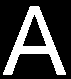

Nearest Neighbor Interpolation (316, 284)


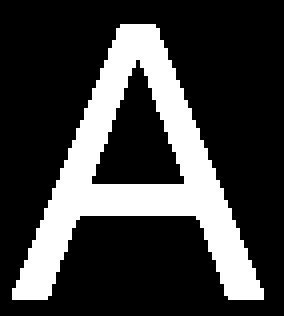

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
from math import floor
from skimage.io import imread


#----------------------------------
# Euclidian Distance
#==================================
def euclidian_dist(a,b):
    '''
    Euclidian distance between 2 points a(x_a, y_a) and b(x_b, y_b)
    Distance = Square Root ( (x_a - x_b)^2 +  (y_a - y_b)^2 )
    '''
    return np.sqrt(((a[0]-b[0])**2)+((a[1]-b[1])**2))

#----------------------------------
# Nearest Neighbour
#==================================
def near_neighbour(X,P):
    '''
    The nearest neighbour of point X(x,y) to the centroid P(x_p, y_p)
    The Neighbourhood is defined by the Upper-Left corner of the point X, which means 3 neighbours and the point X. 
    '''
    i,j = X[0],X[1]
    A = [[i,j],[i,j+1],[i+1,j],[i+1,j+1]]
    dist = [euclidian_dist(A[0],P),euclidian_dist(A[1],P),euclidian_dist(A[2],P),euclidian_dist(A[3],P)]
    minpos = dist.index(min(dist))
    return A[minpos]        

#----------------------------------
# Nearest Neighbour Interpolation
#==================================
def NN_interpolation(im,scale_factor):
    '''
    Interpolation of the image im with scale factor scale_factor, using Nearest Neighbour.
    '''
    row, col = im.shape[0], im.shape[1]
    n_row,n_col = int(scale_factor * row),int(scale_factor * col)
    # fill in  img
    zoom = np.arange(n_row*n_col).reshape(n_row,n_col)
    print("zoom shape is: ",zoom.shape,"image shape is: ", im.shape,'\n')
    for i in range(n_row):
        for j in range(n_col):
            P = [floor(float(i)/scale_factor),floor(float(j)/scale_factor)]
            X = [int(i) for i in P]
            zoom[i][j] = im[near_neighbour(X,P)[0]][near_neighbour(X,P)[1]]
    return zoom



drive.mount('/content/gdrive') 
#영상 불러오기
#im = cv2.imread('/content/gdrive/My Drive/Image_Processing/small-a.bmp')
img = imread('/content/gdrive/My Drive/Image_Processing/small-a.bmp')[...,0]

out = NN_interpolation(img,4.0)

print("original image",img.shape[:2] )
cv2_imshow(img)
print("Nearest Neighbor Interpolation",out.shape[:2])
cv2_imshow(out)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
org (79, 71)


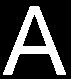

Bilinear Interpolation (316, 284)


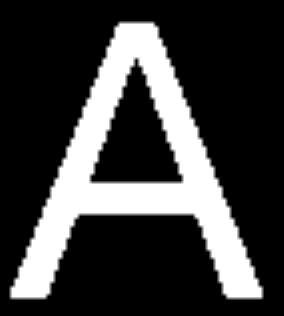

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive

def interpolate_bilinear(array_in, width_in, height_in, array_out, width_out, height_out):
    for i in range(height_out):
        for j in range(width_out):
            # Relative coordinates of the pixel in output space
            x_out = j / width_out
            y_out = i / height_out

            # Corresponding absolute coordinates of the pixel in input space
            x_in = (x_out * width_in)
            y_in = (y_out * height_in)

            # Nearest neighbours coordinates in input space
            x_prev = int(np.floor(x_in))
            x_next = x_prev + 1
            y_prev = int(np.floor(y_in))
            y_next = y_prev + 1

            # Sanitize bounds - no need to check for < 0
            x_prev = min(x_prev, width_in - 1)
            x_next = min(x_next, width_in - 1)
            y_prev = min(y_prev, height_in - 1)
            y_next = min(y_next, height_in - 1)
            
            # Distances between neighbour nodes in input space
            Dy_next = y_next - y_in;
            Dy_prev = 1. - Dy_next; # because next - prev = 1
            Dx_next = x_next - x_in;
            Dx_prev = 1. - Dx_next; # because next - prev = 1
            
            # Interpolate over 3 RGB layers
            for c in range(3):
                array_out[i][j][c] = Dy_prev * (array_in[y_next][x_prev][c] * Dx_next + array_in[y_next][x_next][c] * Dx_prev) \
                + Dy_next * (array_in[y_prev][x_prev][c] * Dx_next + array_in[y_prev][x_next][c] * Dx_prev)
                
    return array_out

drive.mount('/content/gdrive') 
#영상 불러오기
im = cv2.imread('/content/gdrive/My Drive/Image_Processing/small-a.bmp')

height, width = im.shape[:2]
width_2 = width * 4
height_2 = height * 4

# Interpolate in float64
out = np.zeros((height_2, width_2, 3))
out = interpolate_bilinear(im, width, height, out, width_2, height_2)

print("org",im.shape[:2])
cv2_imshow(im)

print("Bilinear Interpolation",out.shape[:2])
cv2_imshow(out)

